In [30]:

pip install numpy pandas matplotlib --upgrade sklearn 


Requirement already up-to-date: numpy in c:\users\hp\anaconda3\lib\site-packages (1.19.0)
Requirement already up-to-date: pandas in c:\users\hp\anaconda3\lib\site-packages (1.0.5)
Requirement already up-to-date: matplotlib in c:\users\hp\anaconda3\lib\site-packages (3.2.2)
Requirement already up-to-date: sklearn in c:\users\hp\anaconda3\lib\site-packages (0.0)
Note: you may need to restart the kernel to use updated packages.


In [31]:
pip install --user --upgrade tensorflow

Requirement already up-to-date: tensorflow in c:\users\hp\anaconda3\lib\site-packages (2.2.0)
Note: you may need to restart the kernel to use updated packages.


In [32]:
pip install keras==2.3.1

Note: you may need to restart the kernel to use updated packages.


In [33]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

X = []
Y = []
total_class = 43
cur_directory = os.getcwd()

In [34]:
#L'ensemble de données comporte des dossiers de 0 à 42, soit 43 classes


for index in range(total_class):
    path = os.path.join(cur_directory,'Train',str(index))
    images = os.listdir(path)
    
    
#itération sur toutes les images du dossier index


    for img in images:
        try:
            image = Image.open(path + '\\' + img)
            image = image.resize((30,30))
            image = np.array(image)
            
            
            X.append(image)
            Y.append(index)
        except:
            print("Error")
            
X = np.array(X)
Y = np.array(Y)

print(X.shape, Y.shape)

(39209, 30, 30, 3) (39209,)


In [35]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("Shape of x_train: ", x_train.shape, " and y_train:",y_train.shape)
print("Shape of x_test: ", x_test.shape, " and y_test:",y_test.shape)

#un codage à chaud des étiquettes

y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

Shape of x_train:  (31367, 30, 30, 3)  and y_train: (31367,)
Shape of x_test:  (7842, 30, 30, 3)  and y_test: (7842,)


In [38]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [39]:
epochs = 15
history = model.fit(x_train, y_train, batch_size=64, epochs=epochs,validation_data=(x_test, y_test))
model.save('traffic_recognition.h5')

Instructions for updating:
Use tf.cast instead.
Train on 31367 samples, validate on 7842 samples
Epoch 1/15
31367/31367 [==============================] - 142s 5ms/step - loss: 2.4968 - accuracy: 0.3842 - val_loss: 0.9664 - val_accuracy: 0.7623
Epoch 2/15
31367/31367 [==============================] - 149s 5ms/step - loss: 1.0229 - accuracy: 0.6976 - val_loss: 0.4517 - val_accuracy: 0.8715
Epoch 3/15
31367/31367 [==============================] - 151s 5ms/step - loss: 0.6152 - accuracy: 0.8157 - val_loss: 0.2469 - val_accuracy: 0.9343
Epoch 4/15
31367/31367 [==============================] - 141s 4ms/step - loss: 0.4274 - accuracy: 0.8729 - val_loss: 0.1515 - val_accuracy: 0.9555
Epoch 5/15
31367/31367 [==============================] - 151s 5ms/step - loss: 0.3420 - accuracy: 0.8994 - val_loss: 0.1227 - val_accuracy: 0.9671
Epoch 6/15
31367/31367 [==============================] - 149s 5ms/step - loss: 0.3000 - accuracy: 0.9115 - val_loss: 0.1046 - val_accuracy: 0.9697
Epoch 7/15
3136

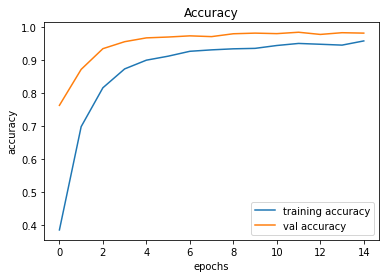

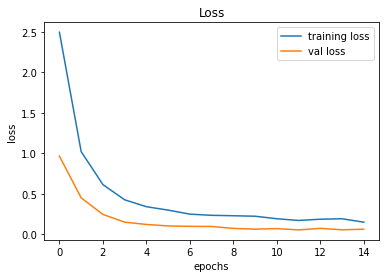

In [40]:
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [41]:
#Tester le modèle

from sklearn.metrics import accuracy_score
import pandas as pd
y_test = pd.read_csv('Test.csv')

labels = y_test["ClassId"].values
img_paths = y_test["Path"].values

test_data=[]

for path in img_paths:
    image = Image.open(path)
    image = image.resize((30,30))
    test_data.append(np.array(image))

test_data = np.array(test_data)
pred = model.predict_classes(test_data)

#Précision des données de test

from sklearn.metrics import accuracy_score
accuracy_score(labels, pred)

0.9507521773555028

In [3]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image
import numpy
#charger le modèle formé pour classer le signe
from keras.models import load_model
model = load_model('traffic_recognition.h5')
#dictionnaire permettant de classer tous les panneaux de signalisation
classes = { 1:'Limite de vitesse (20km/h)',
    2:'Limite de vitesse (30km/h)',
    3:'Limite de vitesse (50km/h)',
    4:'Limite de vitesse (60km/h)',
    5:'Limite de vitesse (70km/h)',
    6:'Limite de vitesse (80km/h)',
    7:'Fin de la limitation de vitesse (80km/h)',
    8:'Limite de vitesse (100km/h)',
    9:'Limite de vitesse (120km/h)',
    10:'Pas de passage',
    11:'Pas de passage de plus de 3,5 tonnes',
    12:'Droit de passage à l''intersection',
    13:'Route prioritaire',
    14:'Rendement',
    15:'Stop',
    16:'Pas de véhicules',
    17:'Veh > 3,5 tonnes interdites',
    18:'Pas d''entrée',
    19:'Mise en garde générale',
    20:'Courbe dangereuse à gauche',
    21:'courbe dangereuse à droite',
    22:'Double courbe',
    23:'route cahoteuse',
    24:'route glissante',
    25:'route se rétrécit sur la droite',
    26:'Travaux routiers',
    27:'Feux de signalisation',
    28:'Piétons',
    29:'Enfants qui traversent',
    30:'Traversée à vélo',
    31:'Attention à la glace/neige',
    32:'Passage d''animaux sauvages',
    33:'Vitesse de fin + dépassement des limites',
    34:'Tournez à droite',
    35:'Tournez à gauche',
    36:'En avant seulement',
    37:'Aller tout droit ou à droite',
    38:'Aller tout droit ou à gauche',
    39:'Garder la droite',
    40:'Gardez la gauche',
    41:'Rond-point obligatoire',
    42:'Fin de l''absence de passage',
    43:'Fin sans passage veh> 3,5 tonnes' }
def classify(file_path):
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    pred = model.predict_classes([image])[0]
    sign = classes[pred+1]
    print(sign)
    result.configure(text=sign)
def show_classify_btn(file_path):
    classify_b=Button(top,text="Classifier l'image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(bg='#364156', fg='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)
def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)
        sign_image.configure(image=im)
        sign_image.image=im
        result.configure(text='')
        show_classify_btn(file_path)
    except:
        pass
if __name__=="__main__":
    #initializes GUI
    top=tk.Tk()
    top.geometry('800x600')
    top.title('Reconnaissance des panneaux de signalisation')
    top.configure(bg='#f9f6f7')
    heading = Label(top, text="Reconnaissance des panneaux de signalisation",pady=20, font=('arial',20,'bold'))
    heading.configure(background='#f9f6f7',fg='#364156')
    heading.pack()
    result=Label(top, font=('arial',15,'bold'))
    result.configure(fg='#011638',bg='#f9f6f7')
    sign_image = Label(top)
    upload=Button(top,text="Télécharger une image",command=upload_image,padx=10,pady=5)
    upload.configure(background='#364156', fg='white',font=('arial',10,'bold'))
    upload.pack(side=BOTTOM,pady=50)
    sign_image.pack(side=BOTTOM,expand=True)
    result.pack(side=BOTTOM,expand=True)
    top.mainloop()

Limite de vitesse (80km/h)
Limite de vitesse (80km/h)
